In [1]:
import sys
sys.path.append("../")
from utils import transform_image_to_kspace, transform_kspace_to_image
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
import pydicom

#data_path = r'C:\from SSD\fastMRI_brain_DICOM\100099070170\279.dcm'
data_path = r'C:\Users\simon\anaconda3\envs\drs\drs\Data\fastMRI_brain_DICOM\300008311232\808.dcm'
data = pydicom.dcmread(data_path)

image = data.pixel_array
if (np.shape(image) != (320, 320)):
    image = cv2.resize(image, (320, 320))

image = (image - np.mean(image)) / np.std(image)

kspace = transform_image_to_kspace(image)

In [2]:
# add Complex Gaussian noise to k space; input is SNR range
def noise(kspace):
    signal_to_noise = random.randint(0, 20) # range chosen based on visual inspectation of the noisy images
    mean_signal = np.mean(np.abs(kspace))
    std_noise = mean_signal / 10**(signal_to_noise / 20) # SNR [dB] = 20log10(S/N)
    noise = np.random.normal(0, std_noise, size=np.shape(kspace)) + 1j*np.random.normal(0, std_noise, size=np.shape(kspace))
    kspace += noise
    return kspace

In [3]:
def noise2(kspace, fraction):   
    mag_re = fraction*np.std(np.real(kspace))
    mag_im = fraction*np.std(np.imag(kspace))
    noise = np.random.normal(0, mag_re, size=np.shape(kspace)) + 1j*np.random.normal(0, mag_im, size=np.shape(kspace))
    kspace += noise
    return kspace

In [4]:
def noise3(kspace, fraction):   
    mag_re = np.std(np.real(kspace))
    mag_im = np.std(np.imag(kspace))
    noise = fraction*(np.random.normal(0, mag_re, size=np.shape(kspace)) + 1j*np.random.normal(0, mag_im, size=np.shape(kspace)))
    kspace += noise
    return kspace

In [5]:
# still inside function
kspace_noise = noise3(kspace, 0.05)

img = transform_kspace_to_image(kspace_noise)
img = (img - np.mean(img)) / np.std(img)

(-0.5, 319.5, 319.5, -0.5)

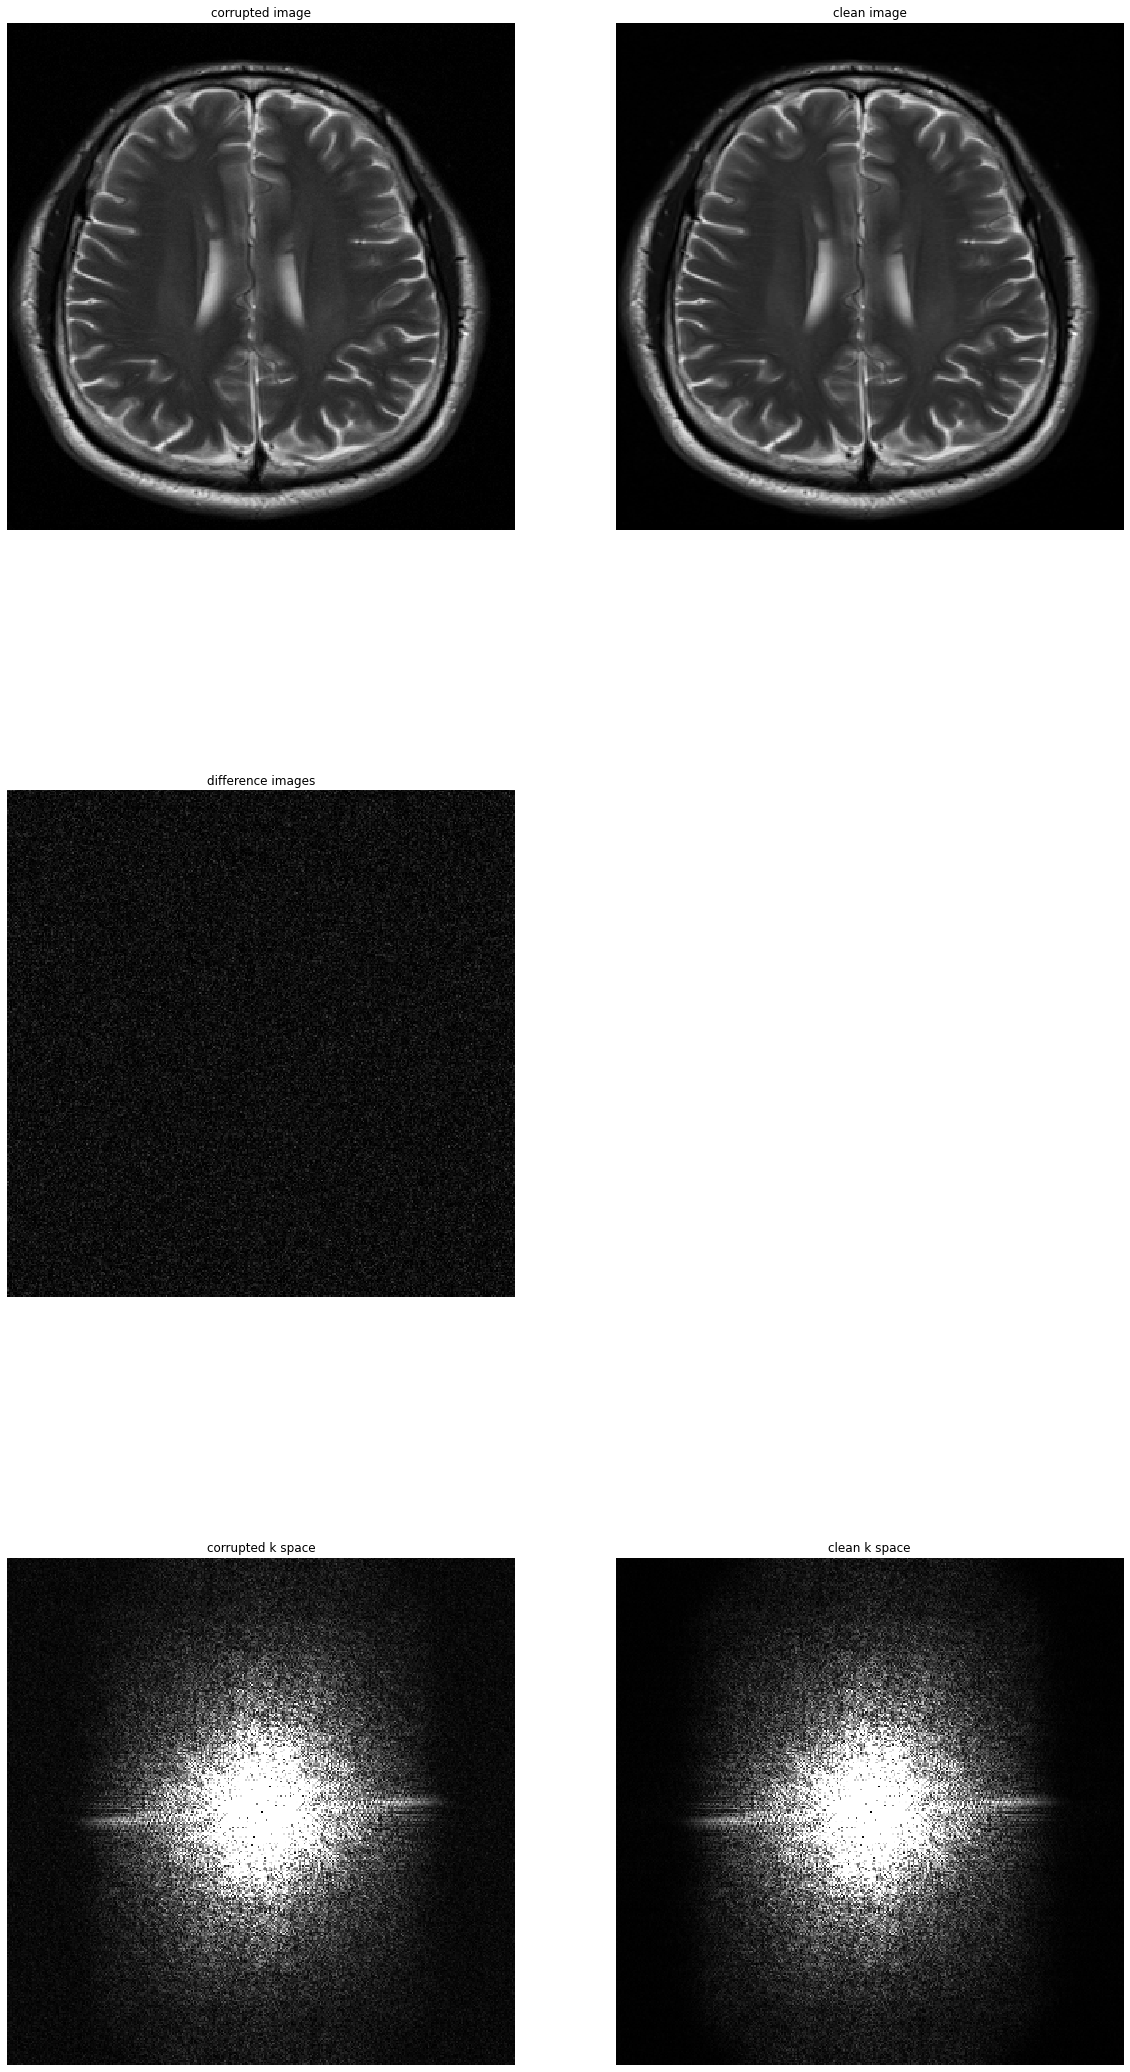

In [6]:
# plotting
hr = image
lr = img

k_lr = np.abs(transform_image_to_kspace(lr))
k_hr = np.abs(transform_image_to_kspace(hr))

k_lr = k_lr / np.max(np.abs(k_lr))
k_hr = k_hr / np.max(np.abs(k_hr))

lr = (lr - np.mean(lr)) / np.std(lr)
hr = (hr - np.mean(hr)) / np.std(hr)

vmx = np.max(hr)
vmn = np.min(hr)
dmx = 0.5
kmx = 0.01

fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(3, 2, 1)
ax.imshow(lr, interpolation='none', cmap='gist_gray', vmin=vmn, vmax=vmx)
ax.set_title("corrupted image")
ax.axis('off')
ax = fig.add_subplot(3, 2, 2)
ax.imshow(hr, interpolation='none', cmap='gist_gray', vmin=vmn, vmax=vmx)
ax.set_title("clean image")
ax.axis('off')
ax = fig.add_subplot(3, 2, 3)
ax.imshow(np.abs(lr - hr), interpolation='none', cmap='gist_gray', vmin=0, vmax=dmx)
ax.set_title("difference images")
ax.axis('off')
ax = fig.add_subplot(3, 2, 5)
ax.imshow(k_lr, interpolation='none', cmap='gist_gray', vmin=0, vmax=kmx)
ax.set_title("corrupted k space")
ax.axis('off')
ax = fig.add_subplot(3, 2, 6)
ax.imshow(k_hr, interpolation='none', cmap='gist_gray', vmin=0, vmax=kmx)
ax.set_title("clean k space")
ax.axis('off')

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(image, img)

0.0012485691996748152